# **Project 1** - Providing Insights on Gun Voilence Data in America

Participants
Sheela Srinivasa
Ben Crutchfield
Melody Yunchen Zhang
Kumar Siddharth
The main purpose of the project is to provide insight to the gun voilence data using statistics and visualization methods available in Python and available packages like Pandas, matplotlib etc. The dataset was obtained from [http://www.kaggle.com ], but it was originally downloaded from [http://www.gunviolencearchive.org/ ]. The dataset contains records of more than 260k gun voilence incidents in the US between January 2013 and March 2018, inclusive.

Gun Violence Archive (GVA) is a not for profit corporation formed in 2013 to provide free online public access to accurate information about gun-related violence in the United States.

## Import Dependencies

In [41]:

import random
import requests
import pandas as pd
import time
import openweathermapy.core as owm
import matplotlib.pyplot as plt
# from config import api_key
import numpy as np
import csv
import datetime
import seaborn as sns
import calendar


import plotly
plotly.tools.set_credentials_file(username='melody9178', api_key='W5hhLb4CAn9Bk6cpOUjc')
import plotly.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go

In [42]:
#Import CSV/API
csv_path = "gun-violence-data_01-2013_03-2018.csv"
GunVoilenceRawData_df = pd.read_csv(csv_path)

In [43]:
# Include additional columns Year and Month
GunVoilenceRawData_df["Year"] = pd.DatetimeIndex(GunVoilenceRawData_df['date']).year
GunVoilenceRawData_df = GunVoilenceRawData_df[(GunVoilenceRawData_df.Year != 2013)]
GunVoilenceRawData_df["Month"] = pd.DatetimeIndex(GunVoilenceRawData_df['date']).month
GunVoilenceRawData_df['Month'] = GunVoilenceRawData_df['Month'].apply(lambda x: calendar.month_abbr[x])
GunVoilenceRawData_df['Victims'] = GunVoilenceRawData_df["n_killed"] + GunVoilenceRawData_df["n_injured"]


In [44]:
#Data Cleanup - Replace "District of Columbia" value with "Washington"
GunVoilenceRawData_df = GunVoilenceRawData_df.replace('District of Columbia', 'Maryland')

In [45]:
# Print cleaned up date
GunVoilenceRawData_df.head()

,incident_id,date,state,city_or_county,n_killed,n_injured,congressional_district,n_guns_involved,Year,Month,Victims
278,95289,1/1/2014,Michigan,Muskegon,0,0,2.0,NaN,2014,Jan,0
279,92401,1/1/2014,New Jersey,Newark,0,0,10.0,NaN,2014,Jan,0
280,92383,1/1/2014,New York,Queens,1,0,5.0,NaN,2014,Jan,1
281,92142,1/1/2014,New York,Brooklyn,0,1,9.0,NaN,2014,Jan,1
282,95261,1/1/2014,Missouri,Springfield,0,1,7.0,NaN,2014,Jan,1


# Shootings by State

In [46]:
#Find valuable data using lists - shottings count per State
State_Shooting = pd.DataFrame(GunVoilenceRawData_df.groupby(['state']).size())
State_Shooting= State_Shooting.reset_index()
State_Shooting.columns = ['state','ShootingCount']
State_Shooting = State_Shooting.set_index('state')
State_Shooting.head()

,ShootingCount
state,
Alabama,5469
Alaska,1349
Arizona,2323
Arkansas,2842
California,16267


In [47]:
# Build State Abbrev Dataframe

us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}


State_Abbrev=pd.DataFrame.from_dict(us_state_abbrev,orient='index')
State_Abbrev.index.name = 'state'
State_Abbrev = State_Abbrev.rename(index = str, columns = {0:"state_abbrev"})

State_Abbrev.head()

,state_abbrev
state,
Alabama,AL
Alaska,AK
Arizona,AZ
Arkansas,AR
California,CA


In [48]:
# To facilitate visualisation, merge State Abbreviation dataframe with State Shooting dataframe
StateAbbrev_Shooting = pd.concat([State_Shooting, State_Abbrev], axis=1, join='outer')
StateAbbrev_Shooting.head()

,ShootingCount,state_abbrev
state,,
Alabama,5469,AL
Alaska,1349,AK
Arizona,2323,AZ
Arkansas,2842,AR
California,16267,CA


In [49]:
# Visualize Shootings by State


for col in StateAbbrev_Shooting.columns:
    StateAbbrev_Shooting[col] = StateAbbrev_Shooting[col].astype(str)

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]


data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = StateAbbrev_Shooting['state_abbrev'],
        z = StateAbbrev_Shooting['ShootingCount'].astype(float),
        locationmode = 'USA-states',
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = 'Shootings Count')
        ) ]

layout = dict(
        title = '2014-2018 US Shootings Count by State',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = None)
             )
    
fig = dict( data=data, layout=layout )
py.iplot( fig, filename='2014-2018 US Shootings Count by State' )


# Shooting and Killed by time

In [99]:
ShootingTime = pd.DataFrame(GunVoilenceRawData_df.groupby(['date']).size())
ShootingTime = ShootingTime.reset_index()
ShootingTime.columns = ['Date','ShootingCount']
ShootingTime['Date'] =pd.to_datetime(ShootingTime['Date'], format='%m/%d/%Y')
ShootingTime = ShootingTime.sort_values('Date')
ShootingTime.head()


,Date,ShootingCount
0,2014-01-01,216
55,2014-01-02,119
109,2014-01-03,124
124,2014-01-04,140
129,2014-01-05,130


In [100]:

VictimsTime = pd.DataFrame(GunVoilenceRawData_df.groupby(['date'])['Victims'].sum())
VictimsTime = VictimsTime.reset_index()
VictimsTime.columns = ['Date','Victims']
VictimsTime['Date'] =pd.to_datetime(VictimsTime['Date'], format='%m/%d/%Y')
VictimsTime= VictimsTime.sort_values('Date')
VictimsTime.head()

,Date,Victims
0,2014-01-01,182
55,2014-01-02,77
109,2014-01-03,96
124,2014-01-04,110
129,2014-01-05,97


In [101]:
ShootingTimeData = go.Scatter(
                  x=ShootingTime.Date,
                  y=ShootingTime['ShootingCount'], name = "ShootingCount",
                  line = dict(color = '#17BECF'))

VictimsTimeData = go.Scatter(
                  x=VictimsTime.Date,
                  y=VictimsTime['Victims'], name = "Victims",
                  line = dict(color = '#7F7F7F'))

TimeData = [ShootingTimeData,VictimsTimeData]

layout = dict(
    title='Shooting and Victims by Time',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='12m',
                     step='month',
                     stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(),
        type='date'
    )
)


fig = dict(data=TimeData, layout=layout)
py.iplot(fig, filename = "Shooting and Victims by Time")


# Shooting and Victims by Month

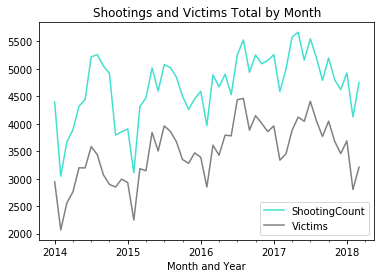

In [104]:

VictimsTime = pd.DataFrame(GunVoilenceRawData_df.groupby(['date'])['Victims'].sum())
VictimsTime = VictimsTime.reset_index()
VictimsTime.columns = ['Date','Victims']
VictimsTime['Date'] =pd.to_datetime(VictimsTime['Date'], format='%m/%d/%Y')
VictimsTime['Month and Year'] = VictimsTime['Date'].dt.to_period('M')
VictimsTime = VictimsTime.set_index('Month and Year')
VictimsTime = pd.DataFrame(VictimsTime.groupby(['Month and Year']).sum())
# VictimsTime.head()
ShootingTime = pd.DataFrame(GunVoilenceRawData_df.groupby(['date']).size())
ShootingTime = ShootingTime.reset_index()
ShootingTime.columns = ['Date','ShootingCount']
ShootingTime['Date'] =pd.to_datetime(ShootingTime['Date'], format='%m/%d/%Y')
ShootingTime['Month and Year'] = ShootingTime['Date'].dt.to_period('M')
ShootingTime = ShootingTime.set_index('Month and Year')
ShootingTime = pd.DataFrame(ShootingTime.groupby(['Month and Year']).sum())
# ShootingTime.head()
GunViolence_Time=pd.concat([ShootingTime, VictimsTime], axis=1, join_axes=[ShootingTime.index])
GunViolence_Time.head()
GunViolence_Time.plot.line()
for ax in plt.gcf().axes:
    ax.get_lines()[0].set_color('turquoise')
    ax.get_lines()[1].set_color('grey')
plt.title("Shootings and Victims Total by Month")
plt.legend()
plt.savefig('ShootingVictimsTotal.jpeg', dpi = 300)


# Year on year data by state

In [53]:
#Find valuable data using lists - Year on Year count per State
Y2YStateData = pd.DataFrame(GunVoilenceRawData_df.groupby(['state','Year'])['Victims'].sum())
Y2YStateData= Y2YStateData.reset_index()
Y2YStateData.columns = ['state', 'Year','Victims']
Y2YStateData.head()


Victim2017Data = pd.DataFrame(GunVoilenceRawData_df.groupby(['state','Year'])['incident_id'].count())
Victim2017Data= Victim2017Data.reset_index()
Victim2017Data.head()

Y2YStateData = Y2YStateData.merge(Victim2017Data[["state", "Year","incident_id"]])
Y2YStateData.head()

,state,Year,Victims,incident_id
0,Alabama,2014,916,1318
1,Alabama,2015,947,1034
2,Alabama,2016,1249,1309
3,Alabama,2017,1400,1461
4,Alabama,2018,354,347


In [68]:
Lawxls_path = ("Gun_laws.xlsx")
GunLaw = pd.read_excel(Lawxls_path)
GunLaw.head()


Populationxls_path = ("Population2017.xlsx")
Populationxls = pd.read_excel(Populationxls_path)
Populationxls.head()


# Number killed by state
State2017Data = pd.DataFrame(Y2YStateData.loc[Y2YStateData['Year'].isin(['2017']).values])
State2017Data= State2017Data.reset_index()
State2017Data = State2017Data.merge(GunLaw[["AmountofGunLaws", "state"]])
State2017Data = State2017Data.merge(Populationxls[["population","state"]])
State2017Data["PerCapitaVictims"] = ((State2017Data["Victims"]/State2017Data["population"]) *100000)
State2017Data["PerCapitaIncident"] = ((State2017Data["incident_id"]/State2017Data["population"]) *100000)
State2017Data = State2017Data.sort_values("AmountofGunLaws", ascending=False)
State2017Data.head()

,index,state,Year,Victims,incident_id,AmountofGunLaws,population,PerCapitaVictims,PerCapitaIncident
4,23,California,2017,3376,4588,107,39536653,8.538912,11.604422
6,33,Connecticut,2017,382,780,90,3588184,10.646054,21.738016
10,53,Hawaii,2017,28,68,79,1427538,1.961419,4.763446
28,158,New York,2017,1439,2031,76,19849399,7.249590,10.232048
26,148,New Jersey,2017,938,1342,75,9005644,10.415690,14.901766


In [88]:
PerCapitaAverage = round(np.average(State2017Data["PerCapitaVictims"]))
GunLawAverage = round(np.average(State2017Data["AmountofGunLaws"]))
IncidentAverage = round(np.average(State2017Data["PerCapitaIncident"]))

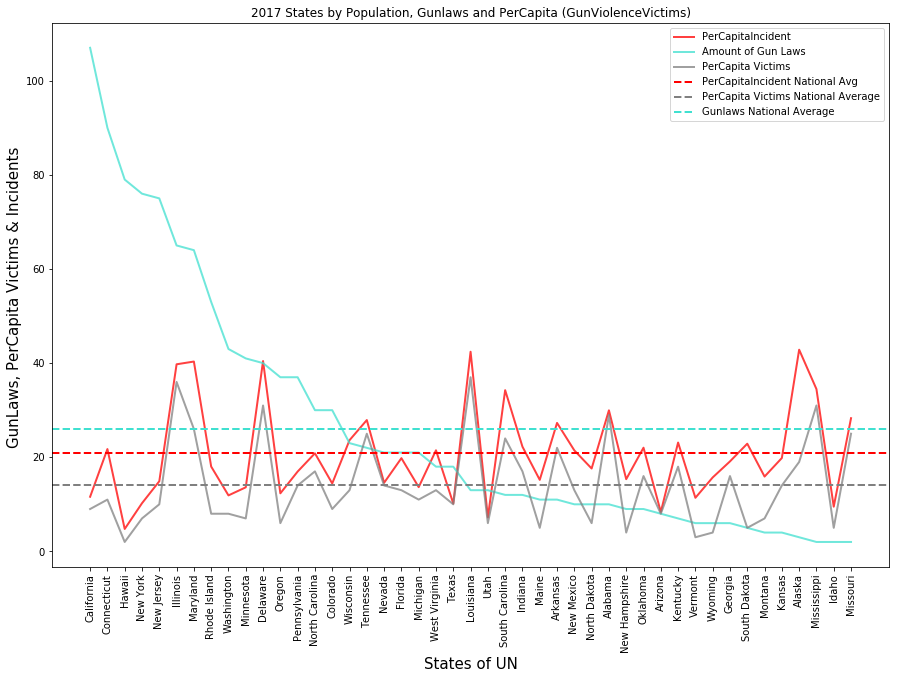

In [109]:
plt.figure(figsize=(15,10))
plt.plot(State2017Data["state"], State2017Data["PerCapitaIncident"], color="red", linestyle='-',alpha=0.75,linewidth=2)
plt.plot(State2017Data["state"], State2017Data["AmountofGunLaws"], color="turquoise", linestyle='-',alpha=0.75,linewidth=2)
plt.plot(State2017Data["state"], round(State2017Data["PerCapitaVictims"]), color="grey",linestyle='-',alpha=0.75,linewidth=2)
plt.axhline(y=IncidentAverage, color='r', linestyle='--',linewidth=2)
plt.axhline(y=PerCapitaAverage, color='grey', linestyle='--',linewidth=2)
plt.axhline(y=GunLawAverage, color='turquoise', linestyle='--',linewidth=2)
plt.xticks(rotation='vertical')
lables = ["PerCapitaIncident","Amount of Gun Laws","PerCapita Victims","PerCapitaIncident National Avg","PerCapita Victims National Average","Gunlaws National Average"]
plt.legend(lables)
plt.title("2017 States by Population, Gunlaws and PerCapita (GunViolenceVictims)")
plt.ylabel('GunLaws, PerCapita Victims & Incidents ',fontsize=15)
plt.xlabel('States of UN',fontsize=15)
plt.savefig('2017StatesGunlawsPerCapita.jpeg')

In [79]:
USPopulationxls_path = ("2010to2018USPopulation.xlsx")
USPopulation = pd.read_excel(USPopulationxls_path)
USPopulation.head()

USVictims = pd.DataFrame(Y2YStateData.groupby(['Year'])['Victims'].sum())
USVictims=USVictims.reset_index()

USVictims = USVictims.merge(USPopulation[["population","Year"]])

USVictims["PerCapitaVictims"] = (USVictims["Victims"]/USVictims["population"] *100000)

USVictims = USVictims[(USVictims.Year != 2018)]

for i in range(1, len(USVictims)):
    USVictims.loc[i, "PopGrowthRate"] = ((USVictims.loc[i, 'population'] - USVictims.loc[i-1, 'population']) /USVictims.loc[i-1, 'population'])*100
for i in range(1, len(USVictims)):
    USVictims.loc[i, "PerCapitaVictimRate"] = ((USVictims.loc[i, 'PerCapitaVictims'] - USVictims.loc[i-1, 'PerCapitaVictims']) /USVictims.loc[i-1, 'PerCapitaVictims'])*100
# USVictims = USVictims[(USVictims.Year != 2014)]
USVictims

,Year,Victims,population,PerCapitaVictims,PopGrowthRate,PerCapitaVictimRate
0,2014,35559,316234505,11.244504,NaN,NaN
1,2015,40451,318622525,12.695587,0.755142,12.904825
2,2016,45646,321039839,14.218173,0.758676,11.993034
3,2017,46214,323405935,14.289781,0.737010,0.503637


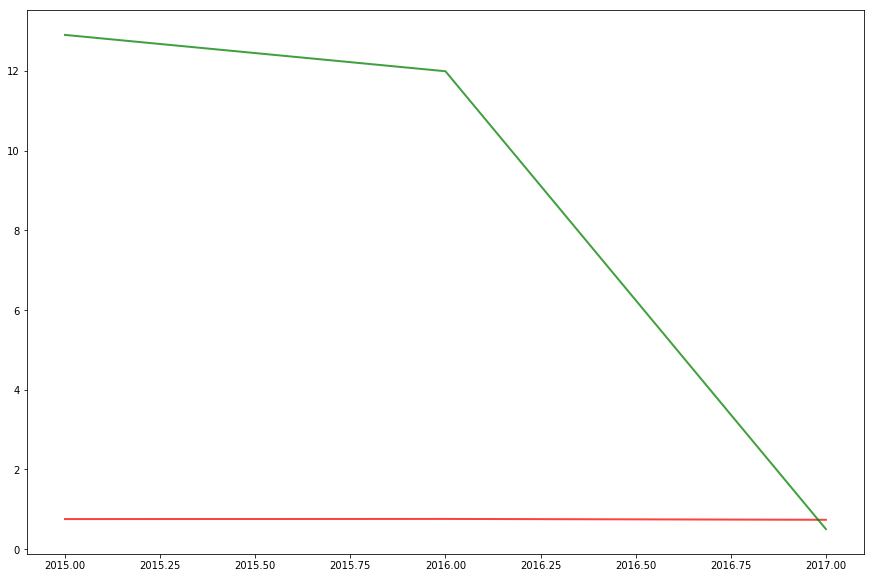

In [92]:
plt.figure(figsize=(15,10))
plt.plot(USVictims["Year"], USVictims["PopGrowthRate"], color="red", linestyle='-',alpha=0.75,linewidth=2)
plt.plot(USVictims["Year"], USVictims["PerCapitaVictimRate"], color="green", linestyle='-',alpha=0.75,linewidth=2)
#  plt.plot(USVictims["Year"], USVictims["population"], color="red", linestyle='-',alpha=0.75,linewidth=2)

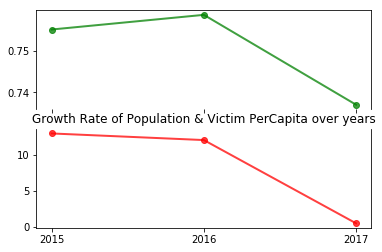

In [72]:
f, (ax, ax2) = plt.subplots(2, 1, sharex=True)
# plt.plot(USVictims["Year"].astype(str), USVictims["PerCapita"], color="navy", linestyle='--',alpha=0.75,linewidth=2,marker="o")
ax2.plot(USVictims["Year"].astype(str), USVictims["PerCapitaVictimRate"], color="red", linestyle='-',alpha=0.75,linewidth=2,marker="o")
ax.plot(USVictims["Year"].astype(str), USVictims["PopGrowthRate"], color="green", linestyle='-',alpha=0.75,linewidth=2,marker="o")
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
plt.title("Growth Rate of Population & Victim PerCapita over years")
plt.savefig('GrowthRate.png', dpi = 300)

In [73]:
# Number of killed by state
StateData = pd.DataFrame(Y2YStateData.groupby(['state'])['incident_id'].sum())
StateData= StateData.reset_index()
StateData.head()

,state,incident_id
0,Alabama,5469
1,Alaska,1349
2,Arizona,2323
3,Arkansas,2842
4,California,16267


In [60]:
# Melody to plot


In [61]:
# Number of killed vs injured data
USAKilled = pd.DataFrame(GunVoilenceRawData_df.groupby(['state'])['n_killed'].sum())
USAKilled = USAKilled.reset_index()
USAInjured = pd.DataFrame(GunVoilenceRawData_df.groupby(['state'])['n_injured'].sum())
USAInjured= USAInjured.reset_index()
USAInjuredvsKilled = pd.merge(USAKilled,USAInjured, on=['state'])
USAInjuredvsKilled["Killed%"] = USAInjuredvsKilled["n_killed"]/(USAInjuredvsKilled["n_killed"]+USAInjuredvsKilled["n_injured"])
USAInjuredvsKilled["Injured%"] = USAInjuredvsKilled["n_injured"]/(USAInjuredvsKilled["n_killed"]+USAInjuredvsKilled["n_injured"])
USAInjuredvsKilled.head()

,state,n_killed,n_injured,Killed%,Injured%
0,Alabama,1877,2989,0.385738,0.614262
1,Alaska,267,325,0.451014,0.548986
2,Arizona,1086,1080,0.501385,0.498615
3,Arkansas,773,1347,0.364623,0.635377
4,California,5516,7505,0.423623,0.576377


In [62]:
# Melody to plot

In [63]:
# Texas and California - Number of killed vs injured data
TexasCalifornia = USAInjuredvsKilled.loc[USAInjuredvsKilled['state'].isin(['Texas','California'])]
TexasCalifornia

,state,n_killed,n_injured,Killed%,Injured%
4,California,5516,7505,0.423623,0.576377
42,Texas,5022,6065,0.452963,0.547037


In [64]:
#People killed by month
MonthWiseKilled = pd.DataFrame(GunVoilenceRawData_df.groupby(['Year','Month'])['n_killed'].sum())
MonthWiseKilled= MonthWiseKilled.reset_index()
MonthWiseKilled.head()

,Year,Month,n_killed
0,2014,Apr,979
1,2014,Aug,1140
2,2014,Dec,1086
3,2014,Feb,845
4,2014,Jan,1070


In [65]:
# Melody to plot

In [66]:
#People killed by month
MonthWiseInjured = pd.DataFrame(GunVoilenceRawData_df.groupby(['Year','Month'])['n_injured'].sum())
MonthWiseInjured= MonthWiseInjured.reset_index()
MonthWiseInjured.head()

,Year,Month,n_injured
0,2014,Apr,1782
1,2014,Aug,2298
2,2014,Dec,1906
3,2014,Feb,1223
4,2014,Jan,1875


In [67]:
#Gun violence by congressional district
DistrictWise_Data = pd.DataFrame(GunVoilenceRawData_df.groupby(['state','congressional_district']).size())
DistrictWise_Data= DistrictWise_Data.reset_index()
DistrictWise_Data.columns = ['state', 'congressional_district','ShootingCount']
DistrictWise_Data.count()

state                     446
congressional_district    446
ShootingCount             446
dtype: int64

In [28]:
# Melody to plot

In [29]:
#Merge/Rename columns if any overlap with different data

In [30]:
#Add columns to generate more specific data that could be useful for analysis

In [31]:
#Add Bins putting data into catagories if numbers are involved

In [32]:
# Find total/average data - use indexes

In [33]:
#Sort Data 

In [34]:
#Find amount of tweets/social media used to cover the topic chosen

In [35]:
#Use API url/query to gather information to determine other data

In [36]:
#Create Dataframe for Data showing the type of data, when it occured, how it occured, etc.

In [37]:
#Plot Pie Graph to show percentages of Data

In [38]:
#Plot Bar Graph/Line Graph/Scatter to show correlations between Data 

In [39]:
#Explain trend(Education level vs. Unemployment level per zones)
#Explain trend (Education level vs. Median Age)
#Explain trend (Education level vs. Household income)
#Explain trend 

In [40]:
#Export Graph images